In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_train_path = '/content/drive/MyDrive/data/test'
data_test_path = '/content/drive/MyDrive/data/train'
data_val_path = '/content/drive/MyDrive/data/validation'

In [4]:
img_width = 380
img_height =380

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 170 files belonging to 17 classes.


In [6]:
#category
data_cat = data_train.class_names

In [8]:
data_cat

['bee',
 'butterfly',
 'cat',
 'cow',
 'crow',
 'deer',
 'dog',
 'dolphin',
 'elephant',
 'flamingo',
 'fly',
 'fox',
 'goat',
 'goldfish',
 'gorilla',
 'leopard',
 'lion']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 170 files belonging to 17 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 1020 files belonging to 17 classes.


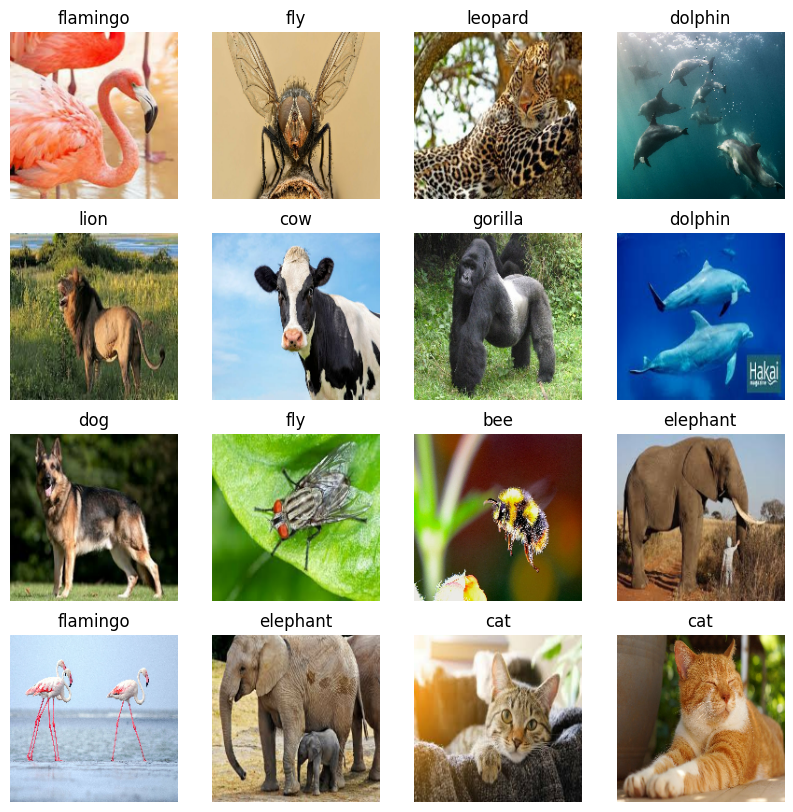

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(16):
        plt.subplot(4, 4, i+1)  # Change to a 4x4 grid
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i].numpy()])
        plt.axis('off')
plt.show()


In [15]:
from tensorflow.keras.models import Sequential

In [16]:
data_train


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))

])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 76s 13s/step - accuracy: 0.0298 - loss: 4.8001 - val_accuracy: 0.1176 - val_loss: 2.8205
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1356 - loss: 2.7924 - val_accuracy: 0.0824 - val_loss: 2.7083
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1577 - loss: 2.6305 - val_accuracy: 0.2059 - val_loss: 2.5717
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.2463 - loss: 2.5483 - val_accuracy: 0.3412 - val_loss: 2.3478
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.2632 - loss: 2.3260 - val_accuracy: 0.4059 - val_loss: 1.9917
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4070 - loss: 1.9194 - val_accuracy: 0.5765 - val_loss: 1.5329
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5369 - loss: 1.4762 - val_accuracy: 0.7824 - val_loss: 0.9932
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7780 - loss: 0.9762 - val_accuracy: 0.8294 - val_loss: 0.7244
Epoch 9/2

Text(0.5, 1.0, 'Loss')

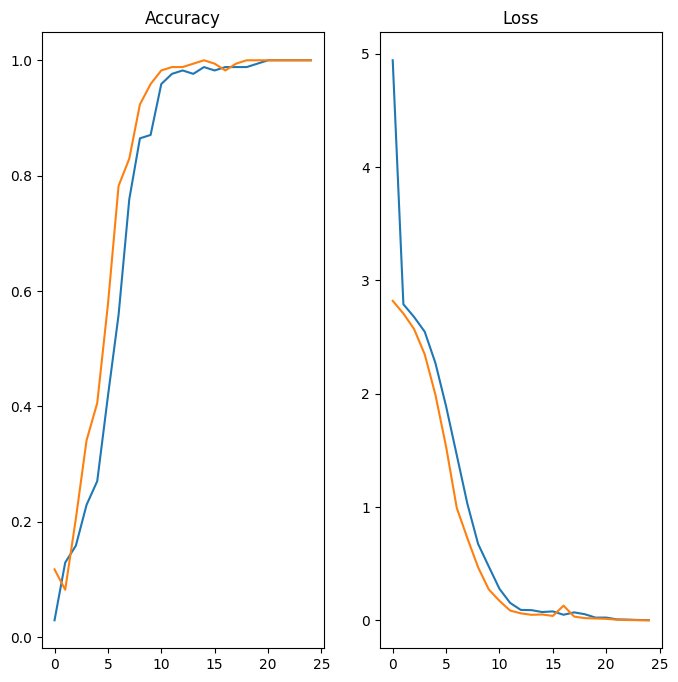

In [20]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [23]:
image = 'butterfly.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [24]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


In [25]:
score = tf.nn.softmax(predict)

In [27]:
print('Animal in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Animal in image is butterfly with accuracy of 100.00


In [28]:
model.save('Image_classify.keras')